### Import Statements

In [1]:
import torch

from src.dataset import ReviewDataset
from src.dataloader_raw import ReviewDataLoader
from src.tokenizer import Tokenizer
from src.classifier import Classifier
from src.explainer_binary_shap import Explainer, Explanation

### Environment Variables

In [2]:
data_path_all = "../../data/all.csv"
state_dict_path = "../../models/binary_classifier_model_best.pt"
out_path = "../../explanations/shap/"
model = "google-bert/bert-base-uncased"
max_length = 256
batch_size = 64

### Load Data

In [3]:
dataset_all = ReviewDataset(data_path_all)
drug_names = dataset_all.get_drug_names()
data_subsets = []
for drug_name in drug_names:
    data_subsets.append({
        "drug_name": drug_name,
        "dataset": dataset_all.get_subset_drug_name(drug_name)
    })

### Initialize Tokenizer

In [4]:
tokenizer = Tokenizer(model, max_length)

### Initialize Classifier

In [5]:
classifier = Classifier(model)
classifier.load_state_dict(torch.load(state_dict_path))

<All keys matched successfully>

### Initialize Explainer

In [6]:
explainer = Explainer(classifier, tokenizer)

### Explain

In [7]:
for data_subset in data_subsets:
    drug_name = data_subset["drug_name"]
    subset = data_subset["dataset"]
    dataloader = ReviewDataLoader(subset, batch_size, shuffle=False)
    explanation = Explanation()
    for batch in dataloader:
       explanation = explanation.union(explainer(batch))
    explanation.save(f"{out_path}/explanation_{drug_name}.json")
    break

PartitionExplainer explainer: 65it [00:46,  1.17it/s]
PartitionExplainer explainer: 65it [00:39,  1.20it/s]
PartitionExplainer explainer: 65it [00:38,  1.19it/s]
PartitionExplainer explainer: 65it [00:38,  1.26it/s]


### Load Explanation

In [3]:
drug_name = "mirtazapine"
explanation = Explanation().load(f"{out_path}/explanation_{drug_name}.json")

### Explore Explanations

In [4]:
print("Drug name:", drug_name)
print("Top positive tokens: ")
print(explanation.get_top_positive_tuples(5))
print("Top negative tokens: ")
print(explanation.get_top_negative_tuples(5))

Drug name: mirtazapine
Top positive tokens: 
[('heavenly', 1.4053997348994018), ('Rapid ', 1.3384789258241654), ('Amazing ', 1.3269820536176362), ('Amazing', 1.177428359763733), ('Living ', 1.0788200159448926)]
Top negative tokens: 
[('Cannot ', 1.1529483278397994), ('Otherwise', 1.0125417732964868), ('Causes ', 0.9178164572351508), ('rage', 0.8456822616680644), ('headed ', 0.8075047742161485)]


### Visualize Explanations

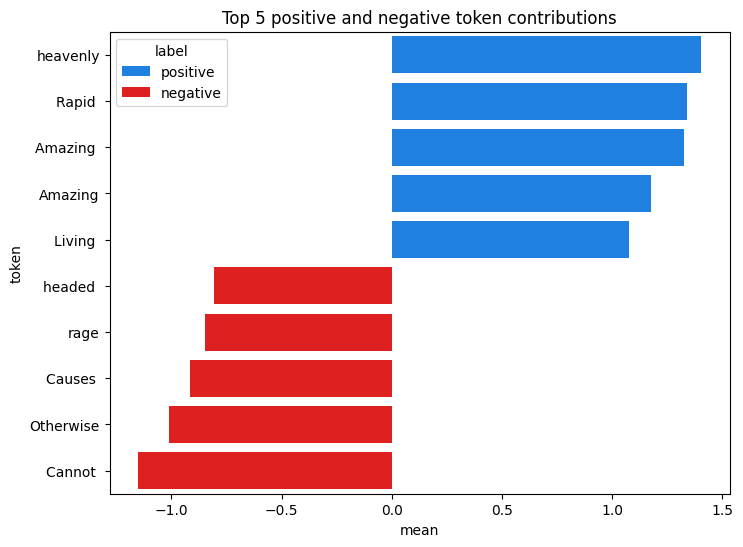

In [5]:
explanation.plot_top_tokens(5)